# Parameter sensitivity analysis (PSA)
Date: 11.10.2024
Name: Silja Svendsen
Description: PSA of networks in Part II. difference in delay time boxplots and velocity boxplots.

In [1]:
import pandas as pd #to import csv file with diff. delay time data.
import numpy as np

In [2]:
from Module_241021 import (load_data_w_glob, time_delay_boxplots, velocity_boxplots)

## Calculate the difference in time delay and save to csv file

In [3]:
calculate_time_diff=False
save_data=False
date="241021"

In [4]:
if calculate_time_diff:
    # 0. load the data
    GN_all = load_data_w_glob(directory_path="PSA_data", file_pattern="GN_*1021.csv")
    GNE_all = load_data_w_glob(directory_path="PSA_data", file_pattern="GNE_*1021.csv")
    GNEO1_all = load_data_w_glob(directory_path="PSA_data", file_pattern="GNEO1_*1021.csv")
    GNEO2_all = load_data_w_glob(directory_path="PSA_data", file_pattern="GNEO2_*1021.csv")

In [5]:
if calculate_time_diff: # Takes about 5 min. Ensure to change filename to avoid overwriting    
    # 1. prepare the reference dataframe
    # by including only catergories relevant for PSA regarding delay times
    GN_all= GN_all[["network", "rel change", "time ss", "parameter", "condition 1", "condition 2"]]

    # 2. sort after "parameter" and "rel change" (all data files contain all params and rel change values)
    # to ensure that the "time ss" data correspons to the same conditions across/ between networks.
    parameter_order = ["alphaGN","alphaEO","KaaNG","KmiNG","KmiEN","KNEG", "KEG","KOG","KmaON","KmaOE"]
    rel_change_order = np.sort(GN_all["rel change"].unique())

    #filenames/ name of the networks I compare delay times 
    filenames = ["GNEvGN","GNEO1vGN", "GNEO2vGN"]

    # 3. begin sample the data
    # 3.1 create an empty list to store each iteration's data
    all_data = []

    for df, filename in zip([GNE_all, GNEO1_all, GNEO2_all], filenames):
        
        # 3.2 prepare the non-reference dataframes
        # by including only catergories relevant for PSA regarding time delay
        dataframe = df[["network", "rel change", "time ss", "parameter", "condition 1", "condition 2"]]
        
        for param in parameter_order:
        
            for change in rel_change_order:
                
                #print(filename, param, change)
                
                # yes, I need seperate mask for reference df and the df I compare with to ensure alignment
                # of rows.
                mask_ref=(GN_all["parameter"]==param) & (GN_all["rel change"]==change)
                mask_compare=(dataframe["parameter"]==param) & (dataframe["rel change"]==change)
                
                # 3.3 calculate the difference in time delay
                # Handle potential row misalignment:
                # Use `.reset_index(drop=True)` to ensure both dataframes have aligned indices.
                time_diff = (dataframe[mask_compare]["time ss"].reset_index(drop=True)
                             - GN_all[mask_ref]["time ss"].reset_index(drop=True))
        
                
                # 3.4 ensure both conditions are True
                # .unique() it's the same for the same set of ICs. I compared the means
                # when defining the original condition 1 and condition 2.
                # Step 5: Extract conditions and compare (alignment handled by the mask)
                
                
                condition1_dataf = dataframe[mask_compare]["condition 1"].unique() == True
                condition1_ref = GN_all[mask_ref]["condition 1"].unique() == True
                condition2_dataf = dataframe[mask_compare]["condition 2"].unique() == True
                condition2_ref = GN_all[mask_ref]["condition 2"].unique() == True
        
                both_networks_condition1 = condition1_dataf and condition1_ref
                both_networks_condition2 = condition2_dataf and condition2_ref
                
                # 3.5 to get the correct shape of dataframe i loop over each time_diff value
                for index in range(len(time_diff)): # len(time_diff)= # ICs. 
                    # 4. sample data
                    data = {
                        "two_networks": filename,
                        "network_ref": GN_all[mask_ref]["network"].tolist()[index],
                        "network_compare": dataframe[mask_compare]["network"].tolist()[index],
                        "parameter":param,
                        "rel change":change,
                        "condition 1": both_networks_condition1[0],
                        "condition 2": both_networks_condition2[0],
                        "time diff": time_diff.tolist()[index]
                    }
               
                    # 4.1 append each iteration's data to the list
                    all_data.append(data)
                    
    # 4.2 concatenate into one dataframe
    all_data_df = pd.DataFrame(all_data)
if save_data:
    # 4.3 Save to CSV
    all_data_df.to_csv(f"time_delay_diff_{date}.csv", index=False)

## difference in time delay boxplots

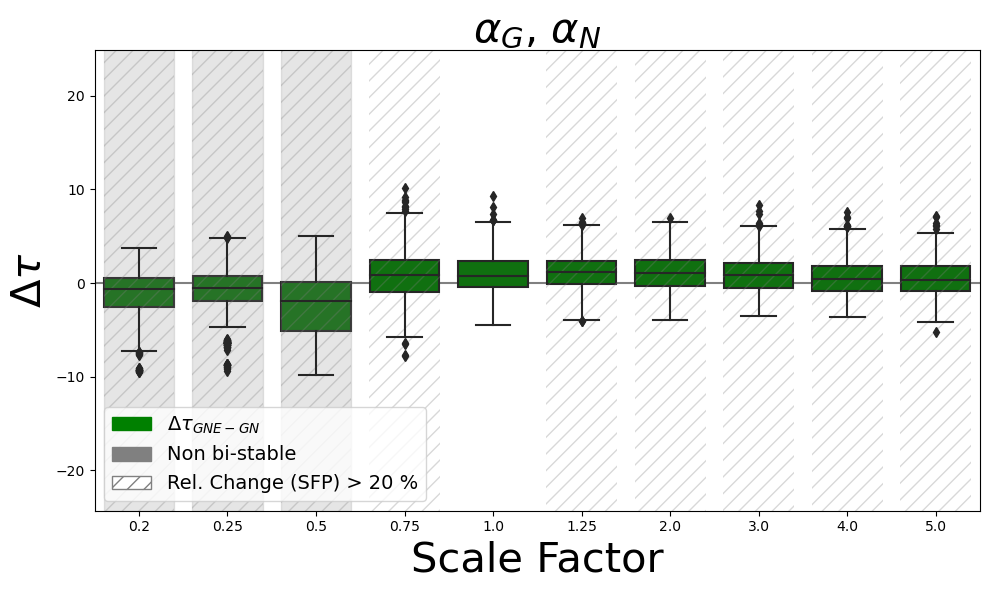

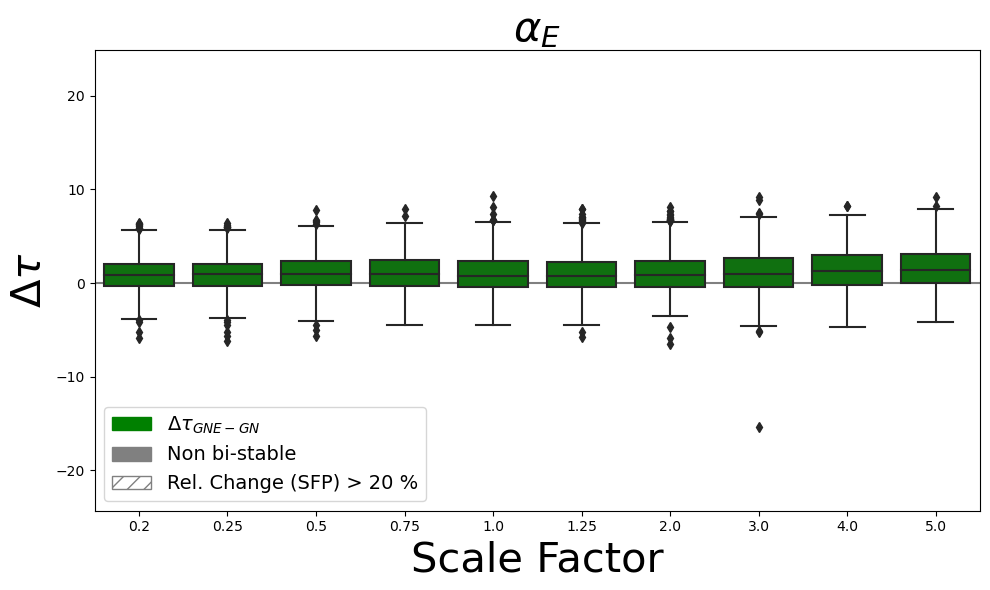

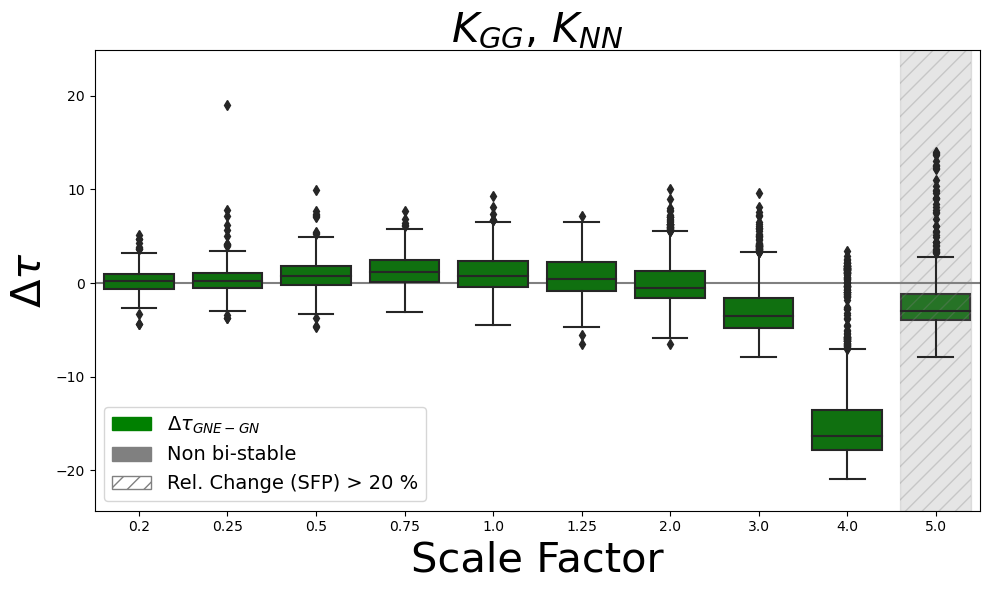

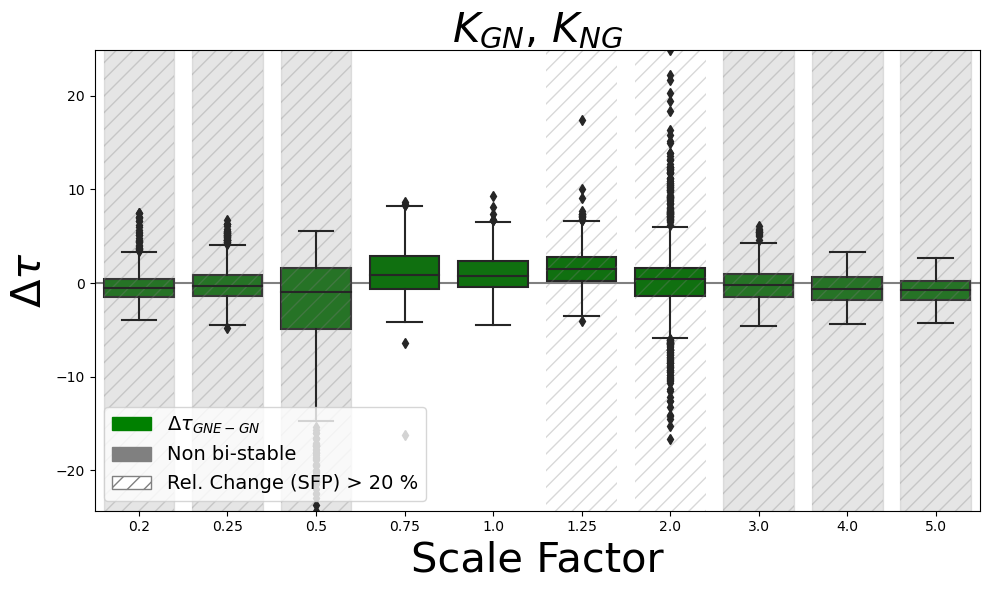

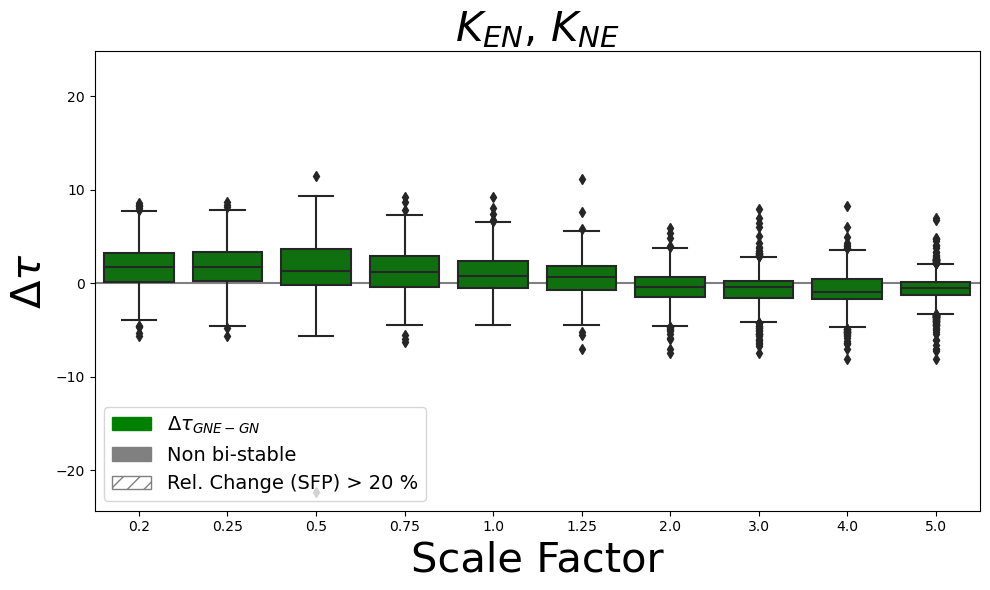

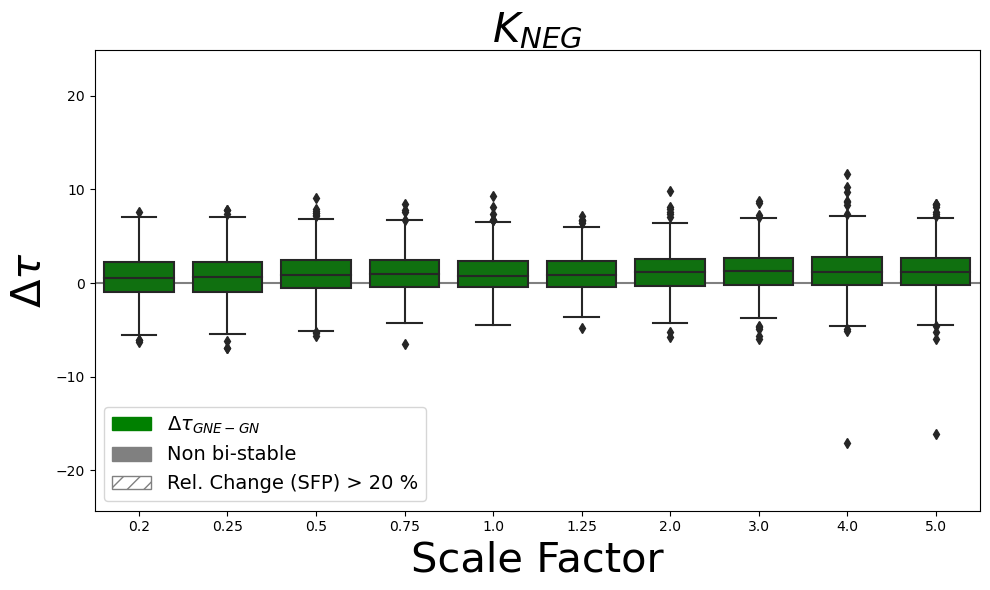

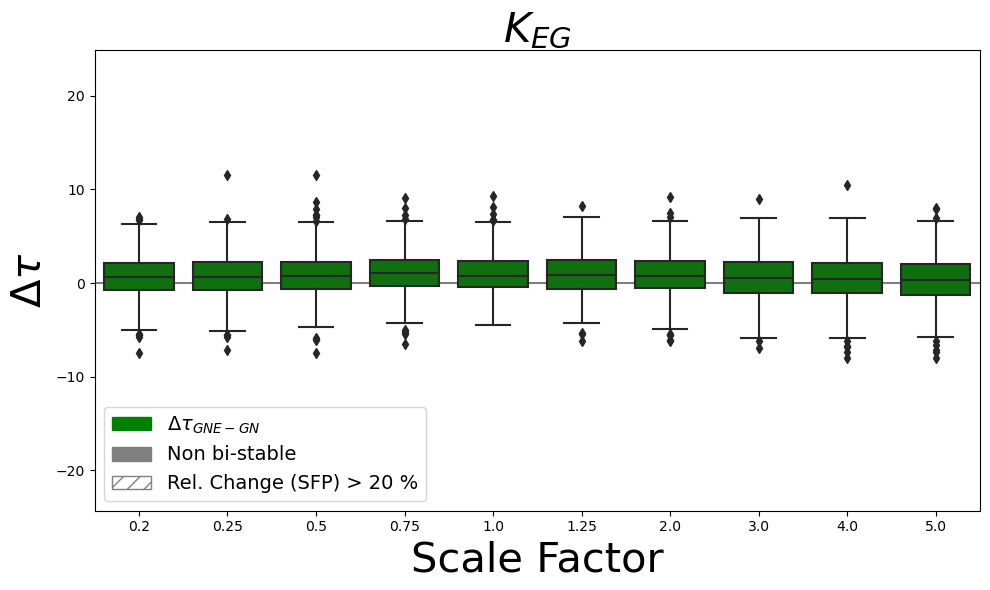

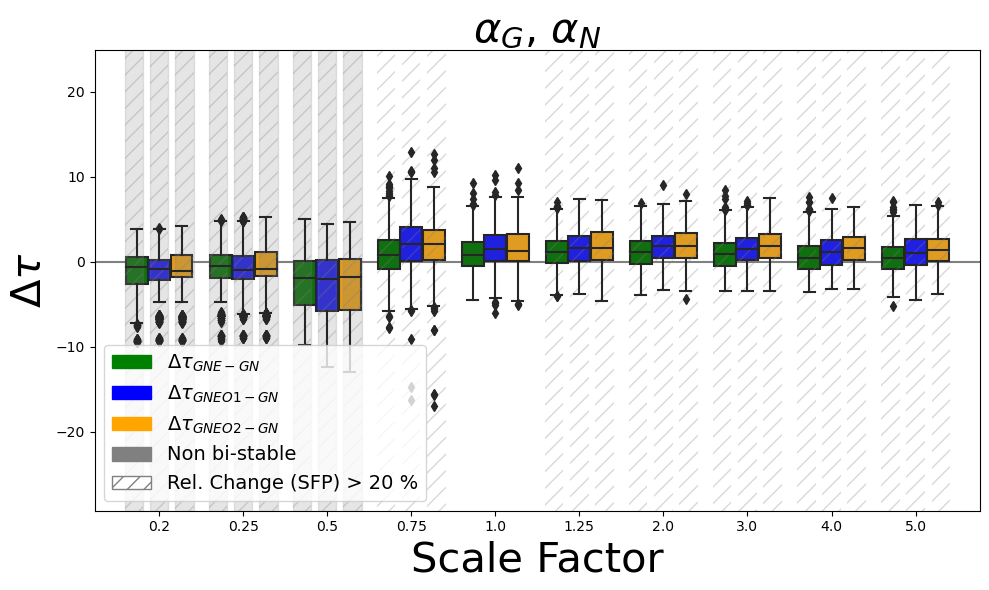

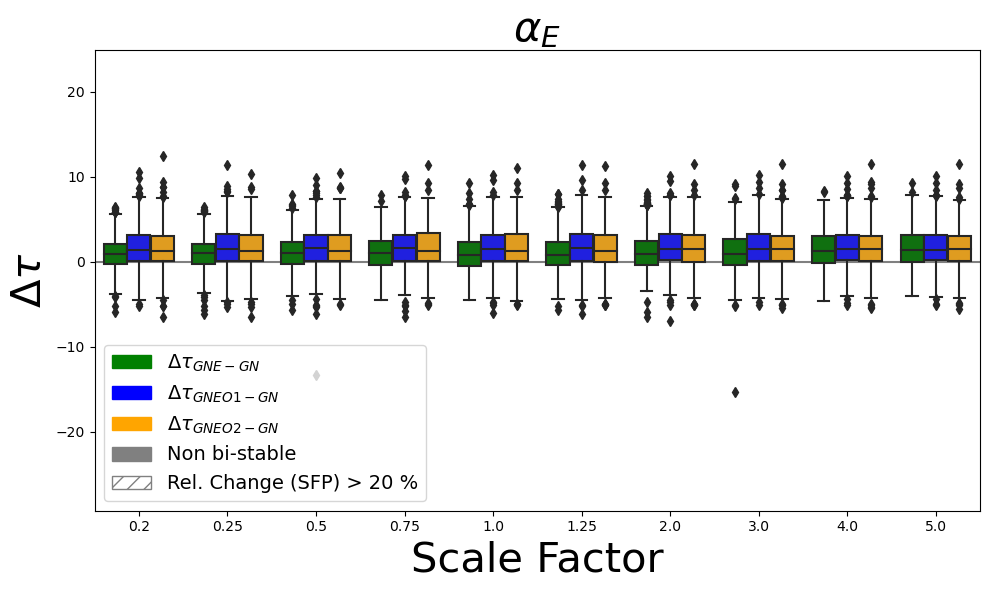

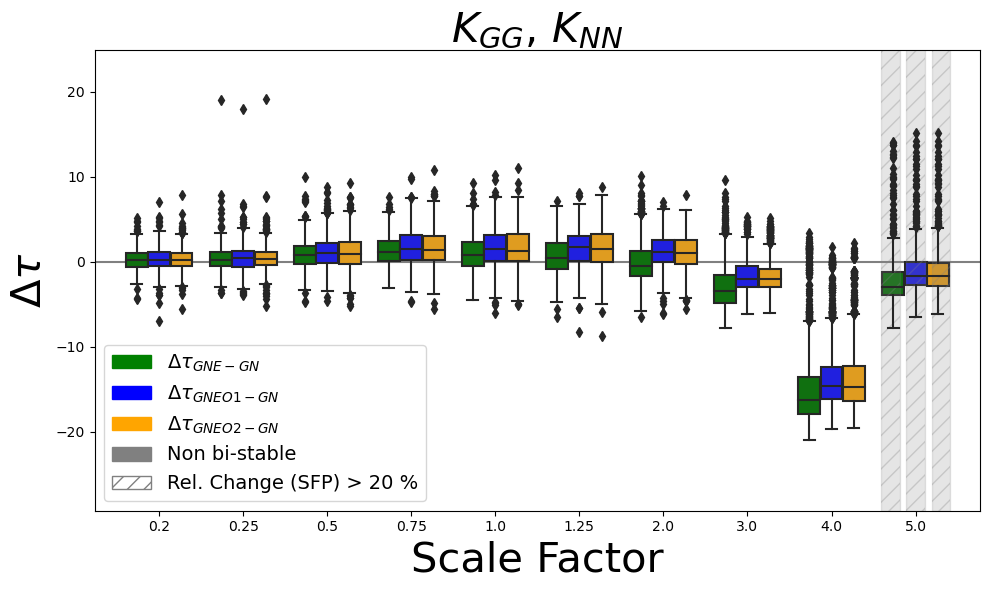

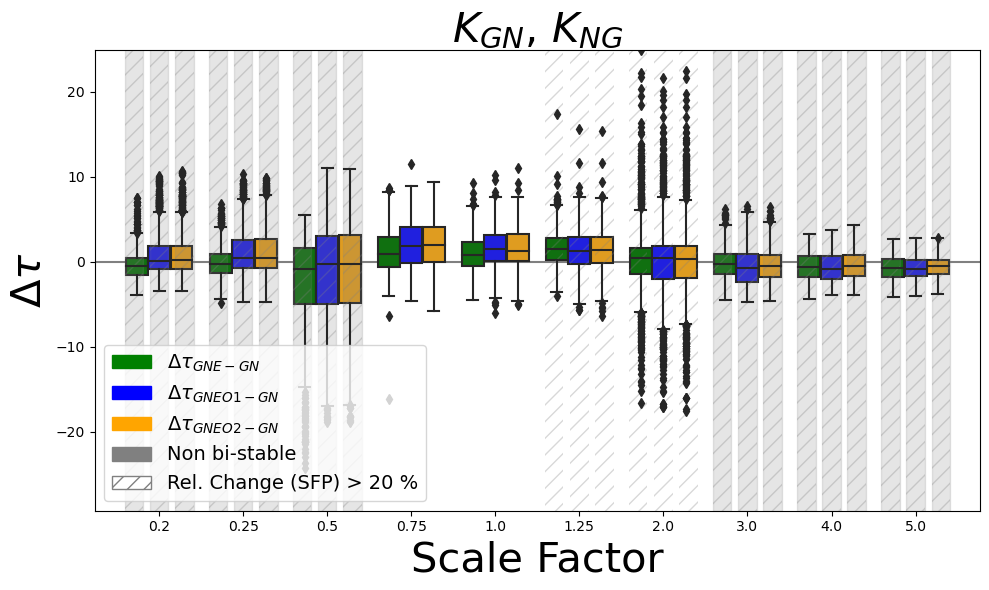

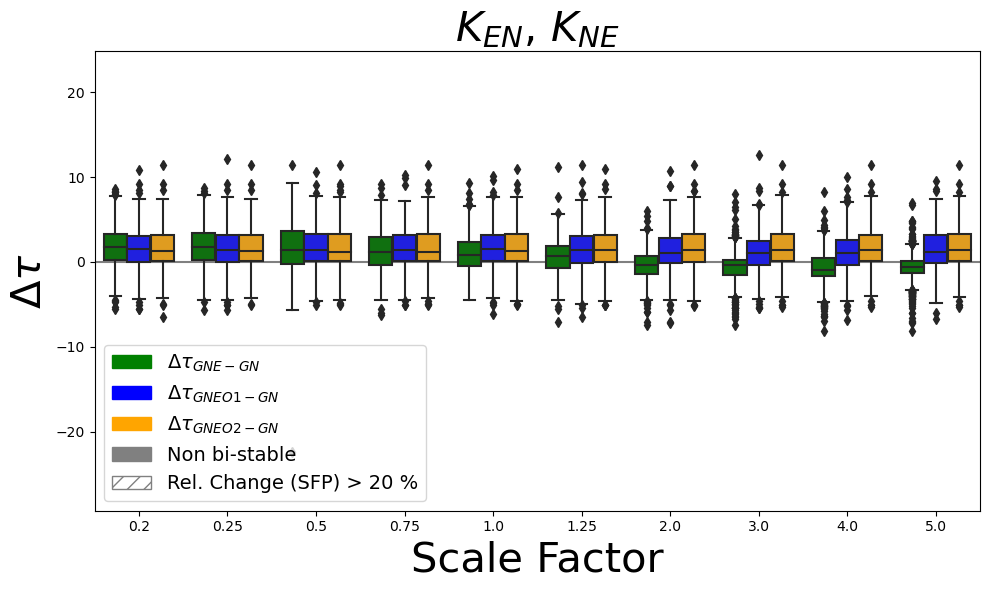

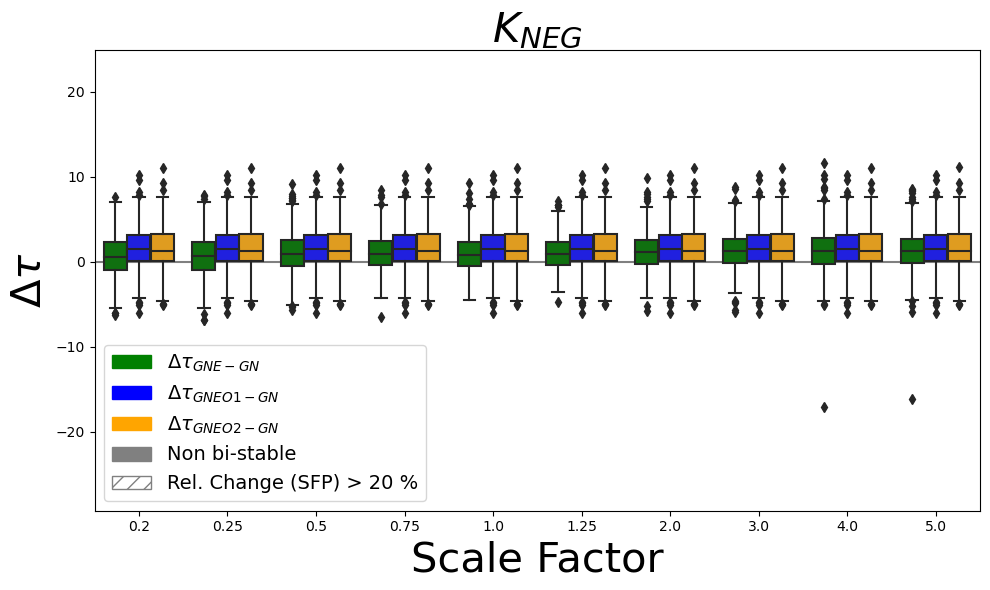

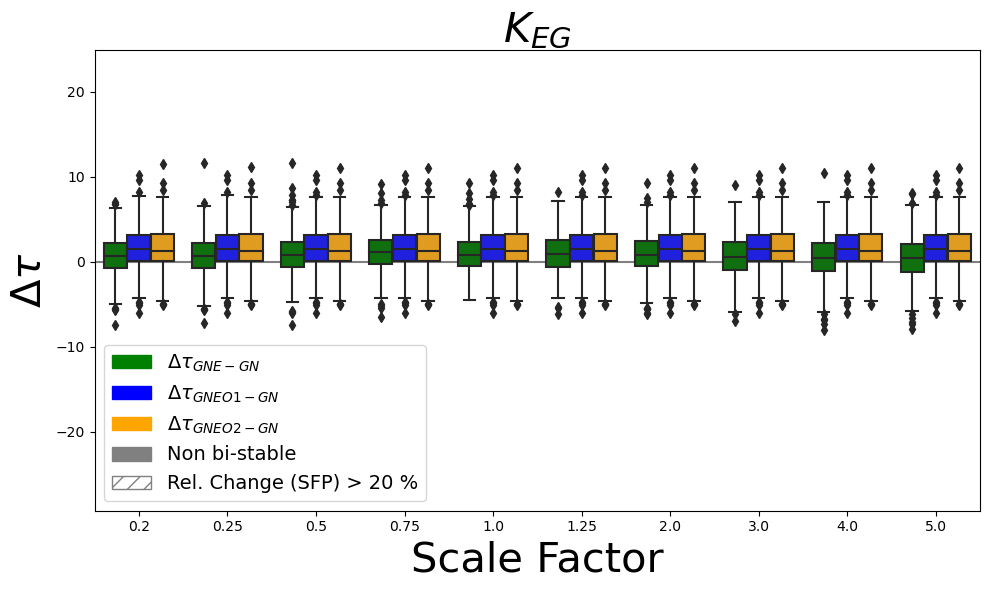

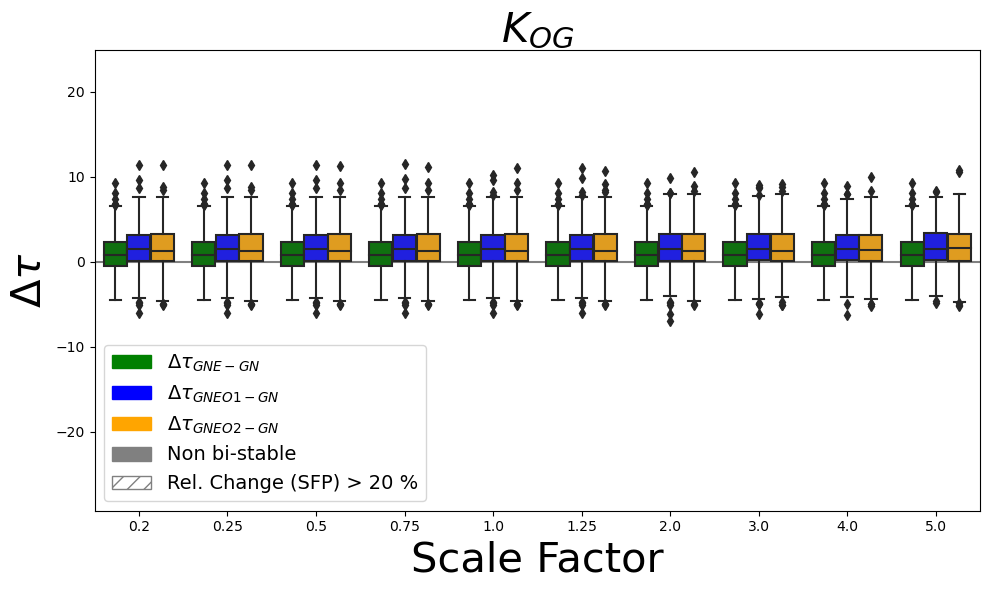

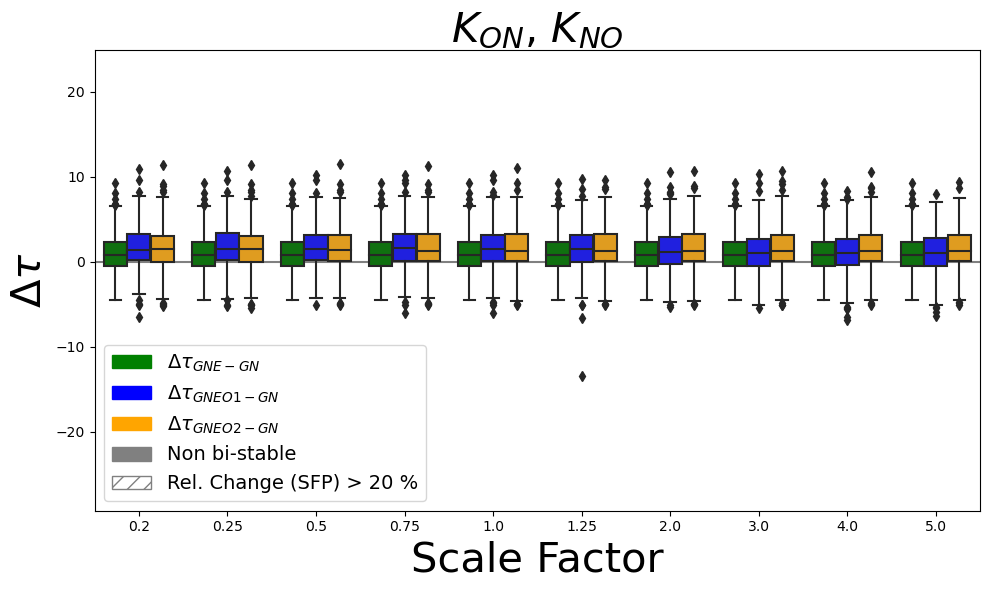

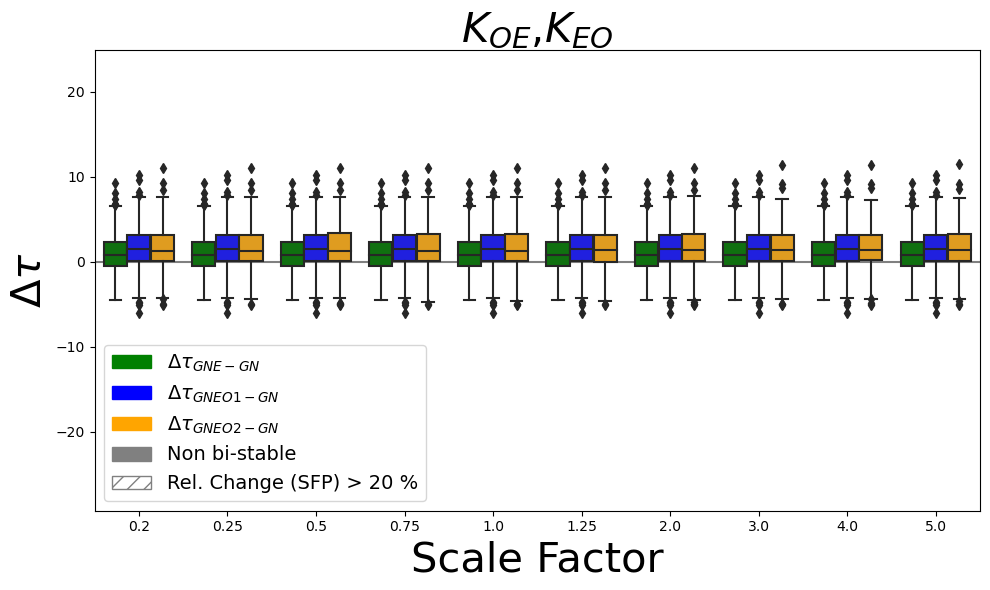

In [6]:
# Load data
# note: the value of condition 1 and condition 2 applies for both networks involved.
time_df = pd.read_csv("time_delay_diff_241021.csv")

# GNE vs GN
time_delay_boxplots(time_df, box_width=0.8, font_size_legend=14,savefig=False)

# GNE, GNEO1, GNEO2 vs GN
time_delay_boxplots(time_df, shift=0.3,box_width=0.22,
                    networks=['GNEvGN','GNEO1vGN','GNEO2vGN'], font_size_legend=14,dy=5,
                    savefig=False
                   )

In [7]:
# example check condition 1 and 2 are correctly plotted.
# time_df[(time_df["two_networks"]=="GNEO2vGN")& (time_df["parameter"]=="KNEG")]["condition 1"].unique()

## velocity boxplots

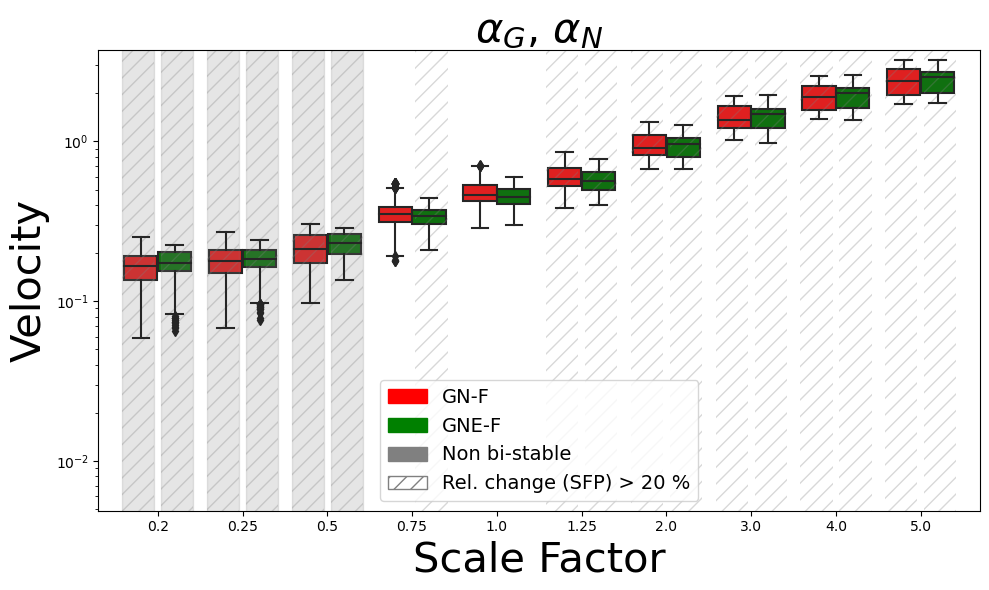

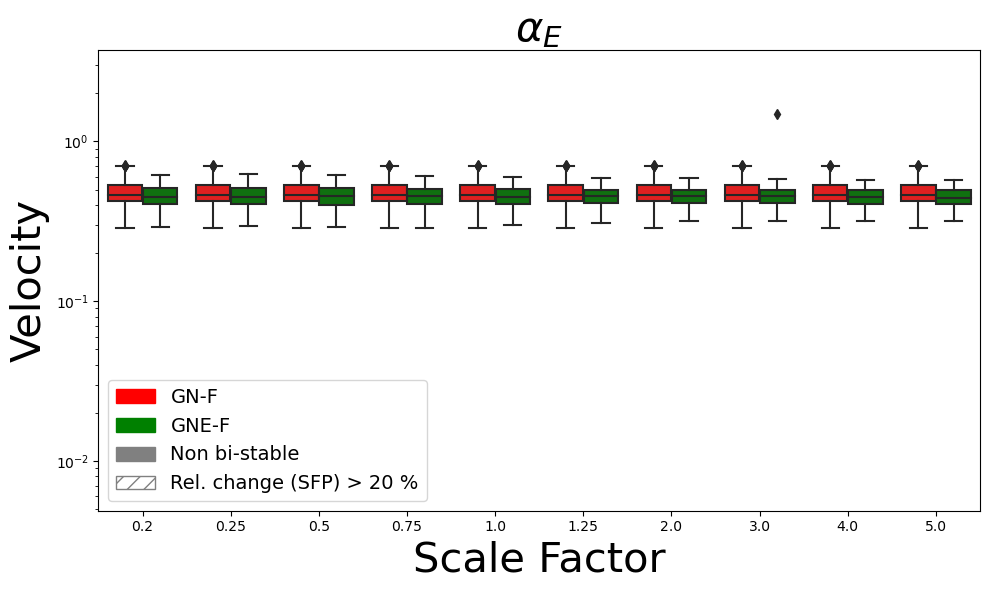

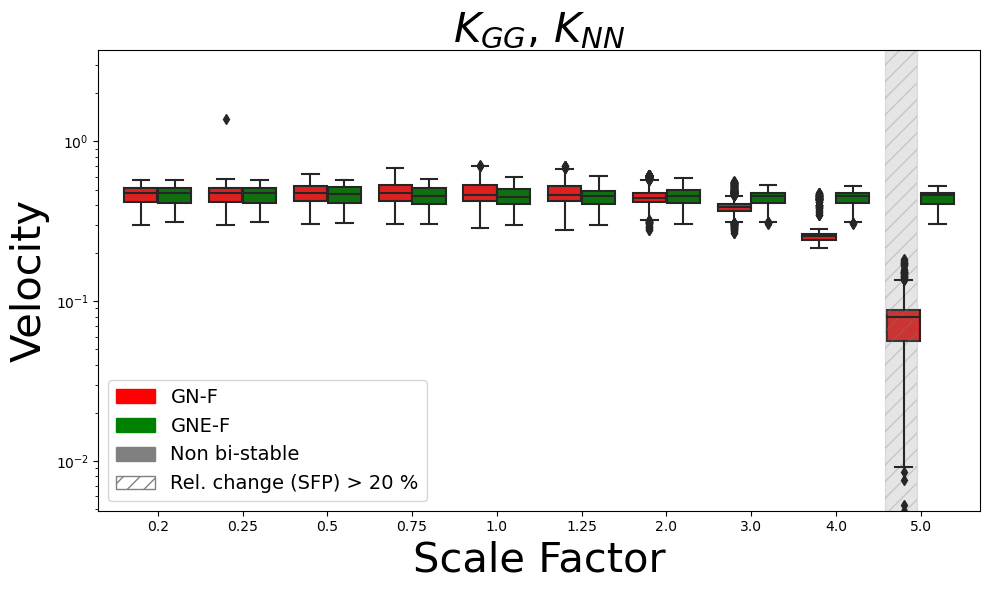

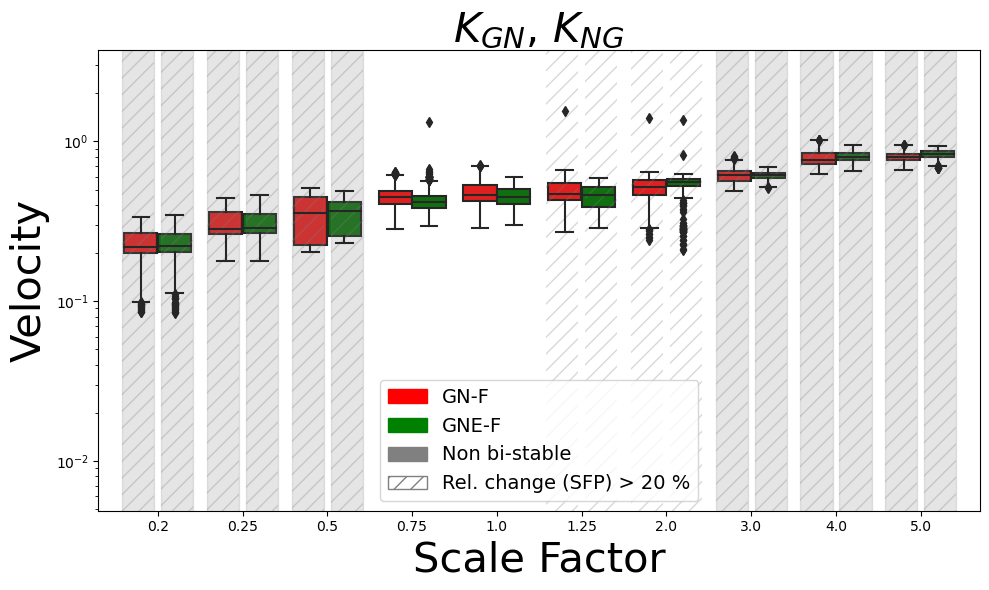

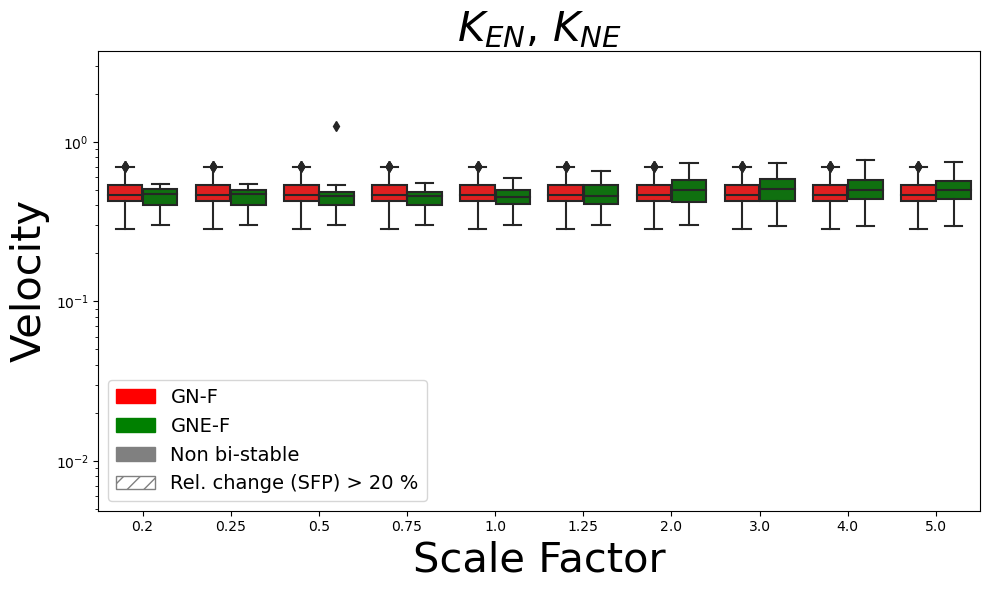

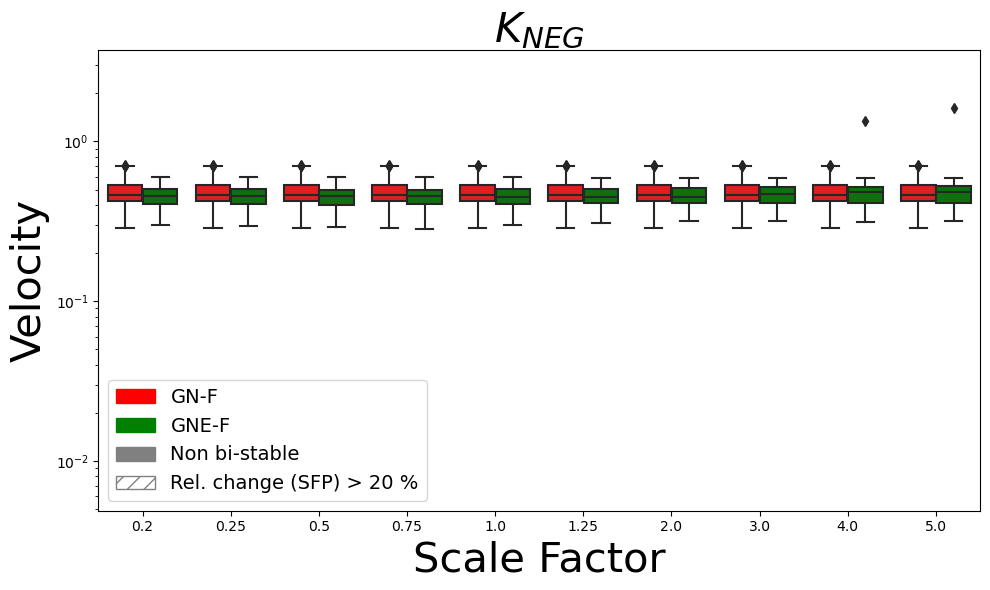

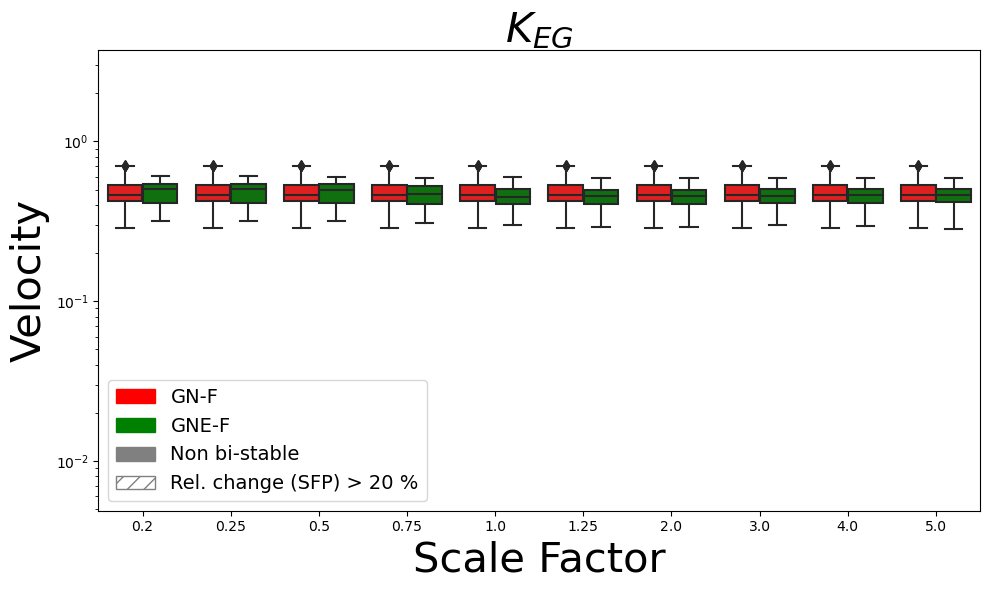

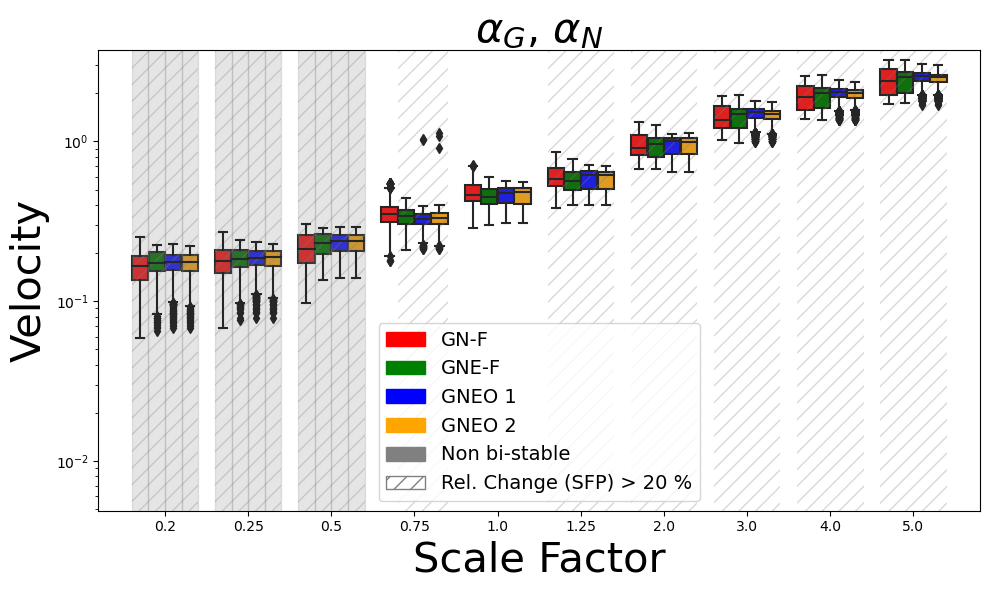

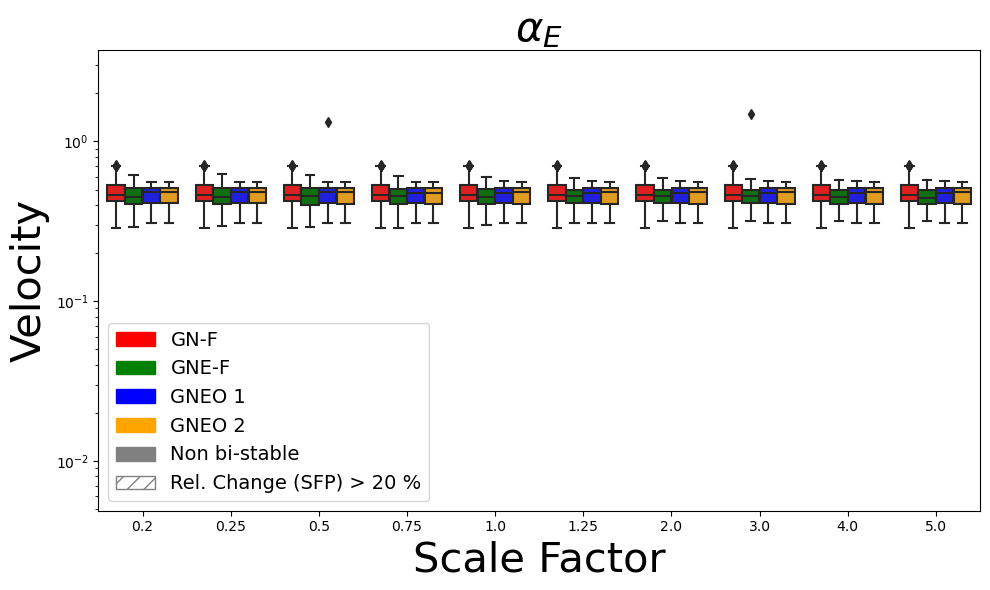

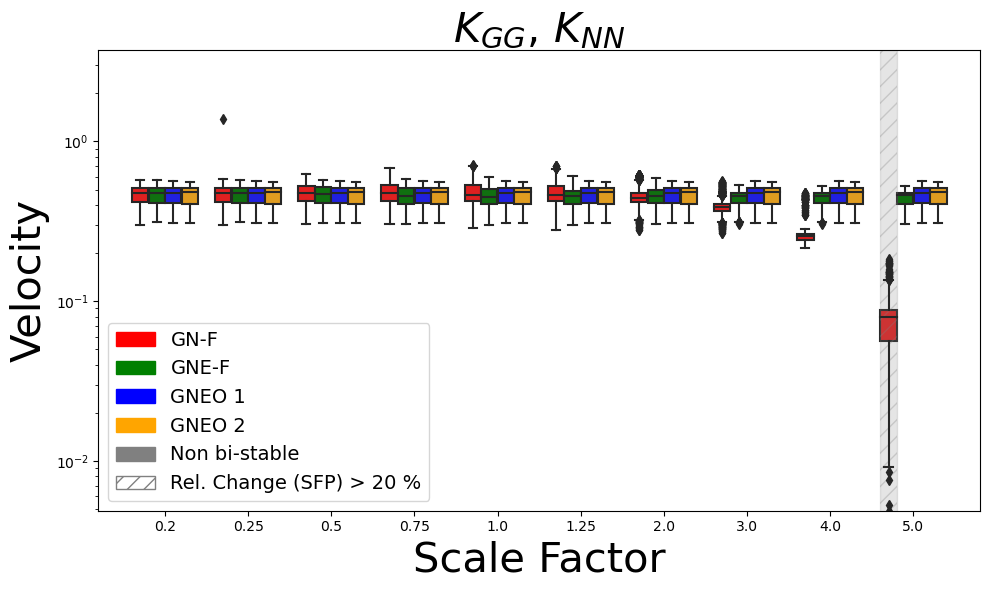

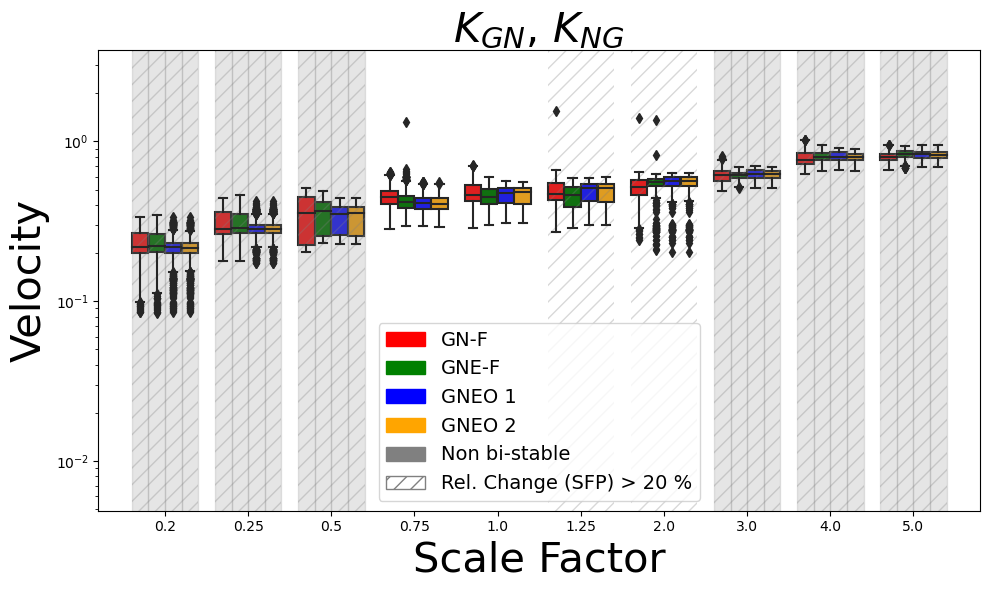

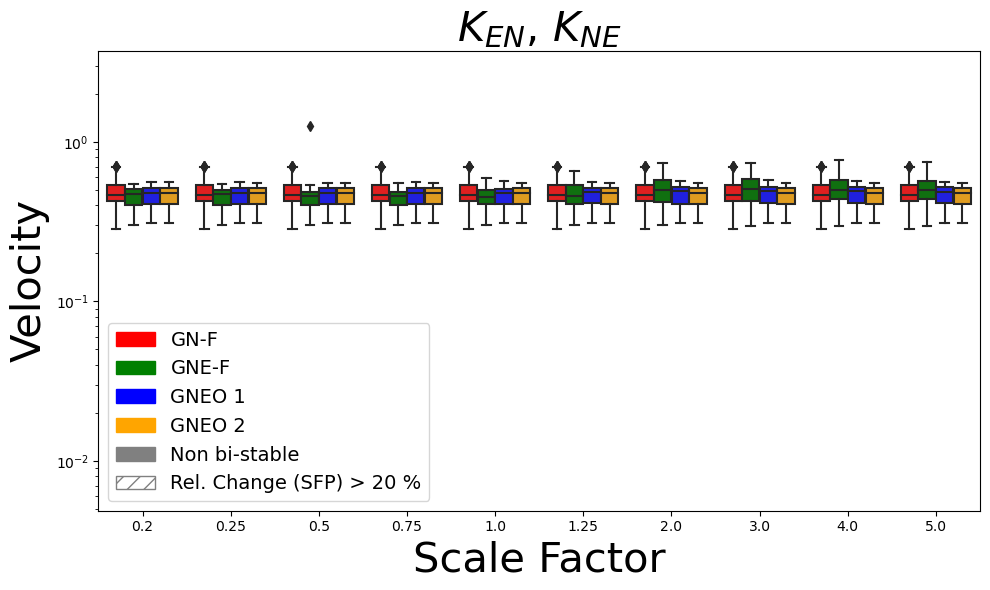

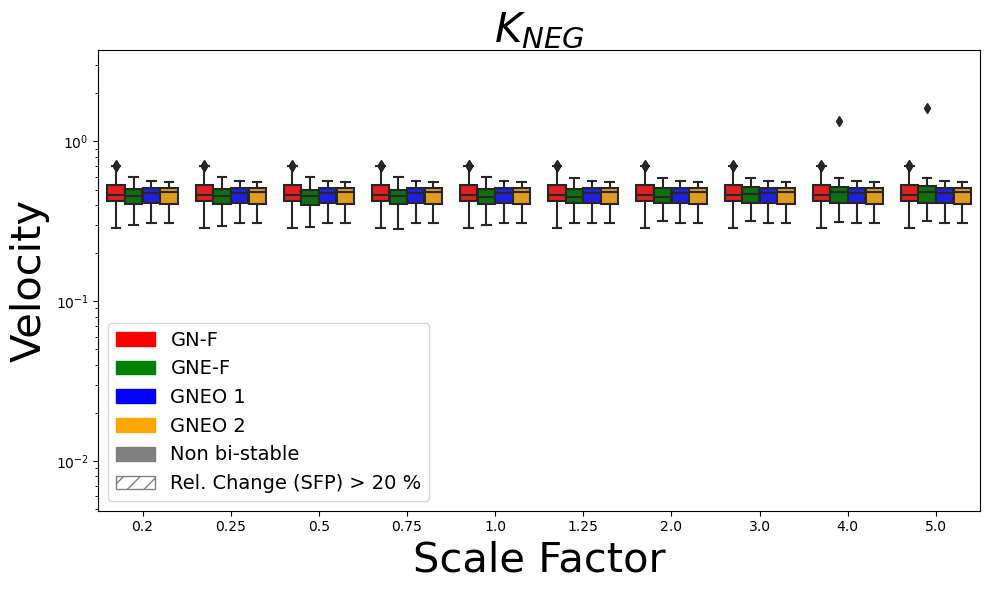

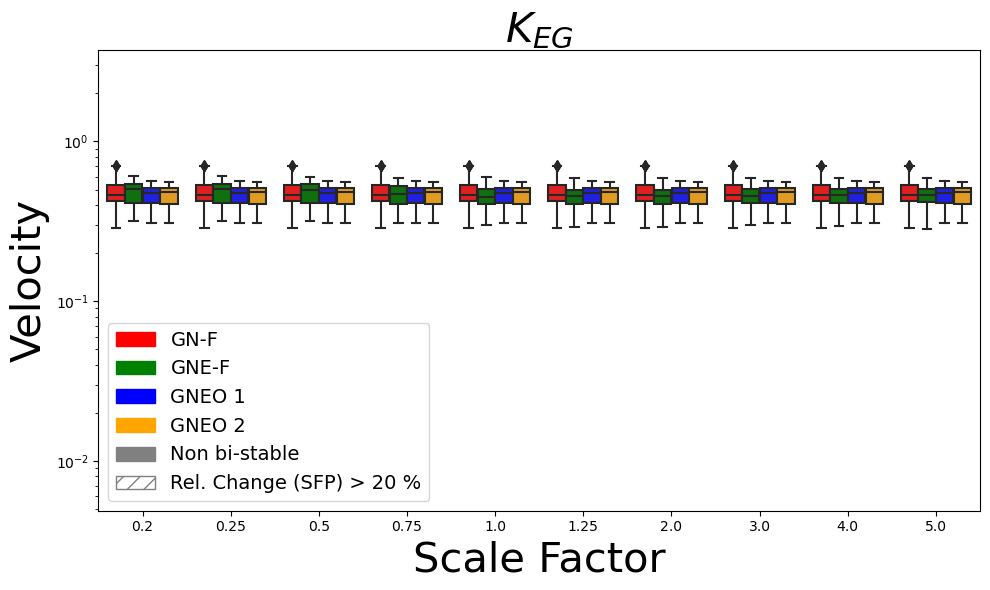

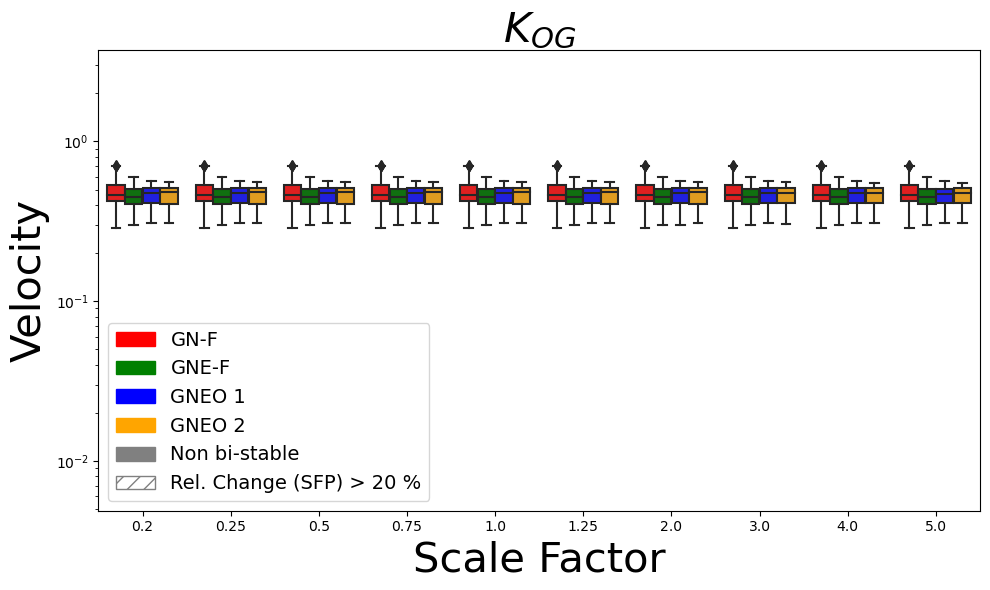

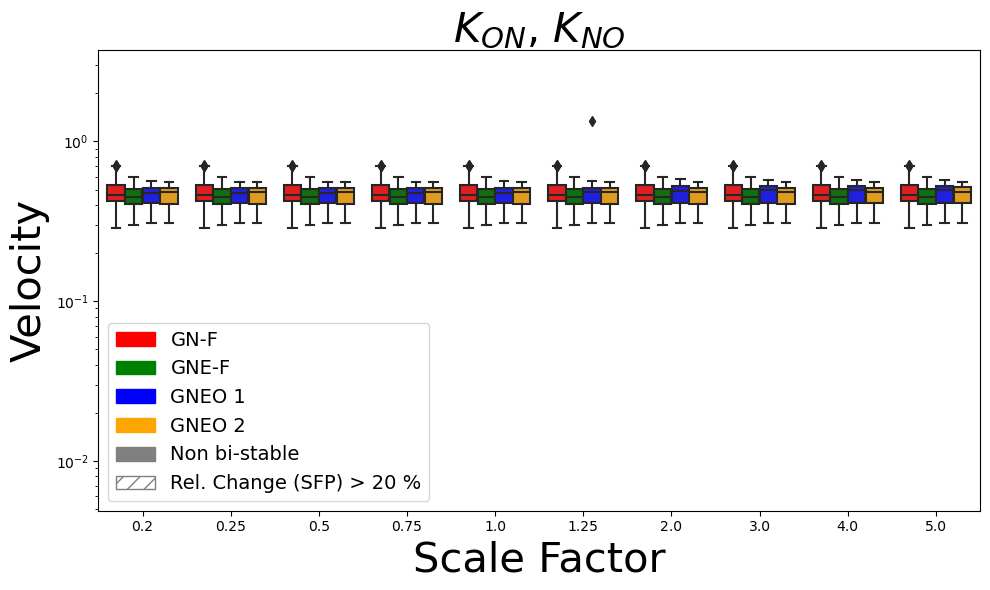

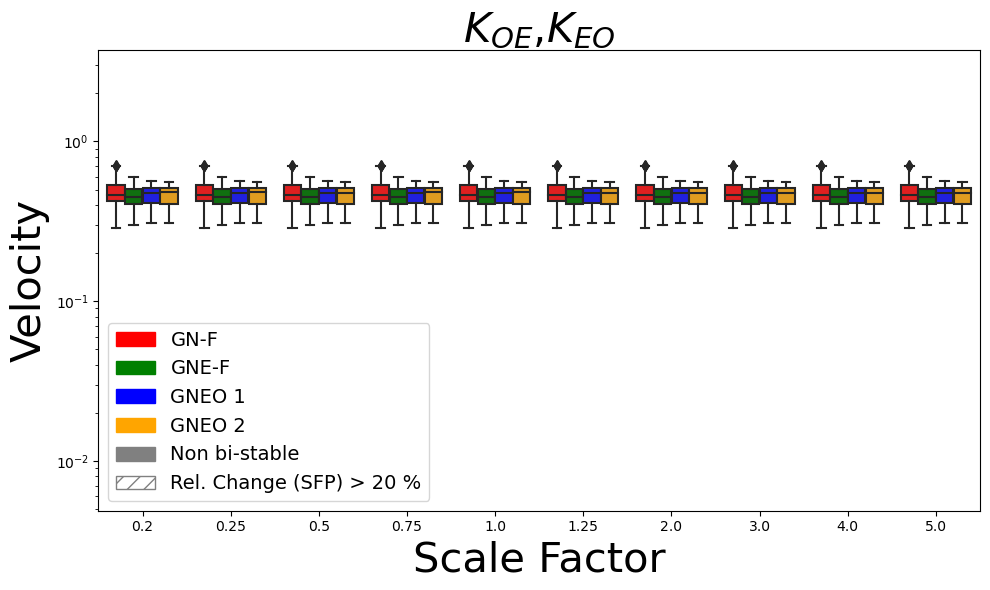

In [8]:
# load data
df_all = load_data_w_glob(directory_path="PSA_data", file_pattern="*1021.csv")

# GNE vs GN
velocity_boxplots(dataframe=df_all, date="241021",networks=["GN","GNE"],
                  shift=0.23, box_width=0.38,savefig=False)

# GN vs GNE vs GNEO1 vs GNEO2
velocity_boxplots(dataframe=df_all, date="241021",networks=["GN", "GNE","GNEO1","GNEO2"],
                  shift=0.3,box_width=0.2,savefig=False)